<a href="https://colab.research.google.com/github/Mergim01/RiverStreamClassification/blob/main/Notebooks/first_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
pip install git+https://github.com/online-ml/river --upgrade

  Cloning https://github.com/online-ml/river to /tmp/pip-req-build-j2jw5z5d
  Running command git clone -q https://github.com/online-ml/river /tmp/pip-req-build-j2jw5z5d


In [23]:
import pandas as pd
import river
import numpy as np
from tqdm.notebook import tqdm

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/Mergim01/RiverStreamClassification/main/Data/ClimateGPT.csv")
# Convert to Format
df.to_dict()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40999 entries, 0 to 40998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40999 non-null  object 
 1   id          40997 non-null  object 
 2   timestamp   40997 non-null  object 
 3   text        40992 non-null  object 
 4   user        40995 non-null  object 
 5   artificial  40995 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


In [25]:
df.head()

,Unnamed: 0,id,timestamp,text,user,artificial
0,0,1450038951205478400,2021-10-18 12:00:01,25/10 (9:00 VN Time) | #GreenFinance | The rol...,f3e7eea57bbc27edeacc,0.0
1,1,1450038955026501632,2021-10-18 12:00:01,How do we prevent the earth from warming any m...,cb7a6648c19c4dcc38d8,0.0
2,2,1450038953743163392,2021-10-18 12:00:01,Event for DMU Staff and Students👀❗ 26 Ideas f...,edd981dafb529ff6c167,0.0
3,3,1450038951742423040,2021-10-18 12:00:01,Chair of the Climate Change Advisory Council h...,a684f497e873988c9491,0.0
4,4,1450038953147572224,2021-10-18 12:00:01,"Back in August, it was no surprise when the Un...",214e29e1cffaec3e44b1,0.0


In [26]:
df = df[["text","artificial"]]
print(df[df.isnull().any(axis=1)])

df = df.dropna() #let us first remove all rows with NaNs
df[["artificial"]] = df[["artificial"]].applymap(np.int64)

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

#mergim ist dumm

           text  artificial
13458       NaN         1.0
17979  🗓️ Today         NaN
17980       NaN         NaN
17981       NaN         NaN
17982       NaN         NaN
31511       NaN         1.0
38221       NaN         1.0
40854       NaN         1.0


In [27]:
print(df.head())
print(len(df))
print(len(df.drop_duplicates(subset='text',keep='first')))

                                                text  artificial
0  25/10 (9:00 VN Time) | #GreenFinance | The rol...           0
1  How do we prevent the earth from warming any m...           0
2  Event for DMU Staff and Students👀❗  26 Ideas f...           0
3  Chair of the Climate Change Advisory Council h...           0
4  Back in August, it was no surprise when the Un...           0
40991
40389


In [28]:
# Convert to Tuple
train_set = train.to_records(index=False)
test_set = test.to_records(index=False)
train_set

rec.array([('@dee3c87eda640ab406d1 I was just watching one of the climate videos and they did a graphic like this. Maybe they should just do this?', 1),
           ('’s list of the top 20 BlackSophisticated climate VCs highlights @617b5f50a9968d3e3b72 https://t.co/T9aA0kZYQz', 1),
           ('This fight is not over and it won’t be over until we win a safe #climate. Tell your Senator and "Democrat" .@a06165f2024181919641: #NoClimateNoDeal.   #ClimateCrisis #ClimateEmergency #ManchinAndSinemaAreTraitors #BuildBackSustainable #RepublicansAreTheProblem  https://t.co/RfpgsKNPAW', 0),
           ...,
           ('@6efc50d8c295c77347e2 Gotta be $SEA! The SEA project is changing how the world deals with environmental data - it will give us a fighting chance against climate change and ocean pollution! Inevitable 100x minimum 🌎 @6896eb2c5b6810aabf43 🐬 https://t.co/pc3ZaN5gKo 🦈 https://t.co/tT6lPxA4Ts', 0),
           ('In this webinar we explore industry issues and challenges in building and us

In [29]:
from river.naive_bayes import MultinomialNB, BernoulliNB
from river.neighbors import KNNClassifier
from river.tree import HoeffdingTreeClassifier, ExtremelyFastDecisionTreeClassifier
from river import linear_model
from river.feature_extraction import BagOfWords,TFIDF
from river import preprocessing
from river.compose import Pipeline 
from river import optim

In [30]:
# Build Pipeline
pipe_nb = Pipeline(('vectorizer',TFIDF()),('nb',MultinomialNB()))
pipe_nb

Pipeline (
  TFIDF (
    normalize=True
    on=None
    strip_accents=True
    lowercase=True
    preprocessor=None
    tokenizer=<built-in method findall of re.Pattern object at 0x7fc8b6a57030>
    ngram_range=(1, 1)
  ),
  MultinomialNB (
    alpha=1.
  )
)

In [31]:
# Specify Steps
pipe_nb.steps

OrderedDict([('vectorizer', TFIDF (
                normalize=True
                on=None
                strip_accents=True
                lowercase=True
                preprocessor=None
                tokenizer=<built-in method findall of re.Pattern object at 0x7fc8b6a57030>
                ngram_range=(1, 1)
              )), ('nb', MultinomialNB (
                alpha=1.
              ))])

In [32]:
# Train
for text,label in tqdm(train_set):
    pipe_nb = pipe_nb.learn_one(text,label)

  0%|          | 0/32792 [00:00<?, ?it/s]

In [33]:
# Make a Prediction
test = 'Mergim ist keine Maschine'
pred = pipe_nb.predict_one(test)
# Prediction Prob
proba_ = pipe_nb.predict_proba_one(test)
print('Predicted test sentence as',pred,' and probability of classes for test as',proba_)

Predicted test sentence as 1  and probability of classes for test as {1: 0.5481869845600976, 0: 0.4518130154399009}


In [34]:
test_set[0][0]

'- Navigating between climate denial and climate delay (Kari Norskog | PreventionWeb | University of California, Berkeley) https://t.co/EzH7yYqfTq via @3f9752959ec6ce1844d9'

In [35]:
example = test_set[0]
pred = pipe_nb.predict_one(example[0])
# Prediction Prob
proba_ = pipe_nb.predict_proba_one(example[0])
print('sentence:',example[0])
print('Predicted test sentence as',pred,' and probability of classes for test as',proba_)
print('True Label:',example[1])

sentence: - Navigating between climate denial and climate delay (Kari Norskog | PreventionWeb | University of California, Berkeley) https://t.co/EzH7yYqfTq via @3f9752959ec6ce1844d9
Predicted test sentence as 0  and probability of classes for test as {1: 0.39201320556875924, 0: 0.6079867944312388}
True Label: 1


In [58]:
# Update the Model on the test data & Check Accuracy
metric = river.metrics.F1()
acc = river.metrics.Accuracy()
metrics = []
Accuracys = []
for text,label in tqdm(test_set):
    y_pred_before = pipe_nb.predict_one(text)
    metric = metric.update(label,y_pred_before)
    acc = acc.update(label,y_pred_before)
    metrics.append(metric.get())
    Accuracys.append(acc.get())
    # Has already learnt the pattern
    #pipe_nb = pipe_nb.learn_one(text,label)
print(metric)

  0%|          | 0/8199 [00:00<?, ?it/s]

F1: 55.68%


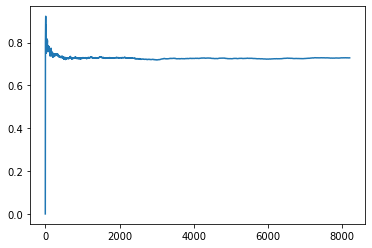

In [60]:
import matplotlib.pyplot as plt
plt.plot(Accuracys)
